In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('izqrendsimple.txt', header=None, names=['X', 'V'], delimiter='\t')
print(df)

      X   V
0   140  88
1   150  89
2   160  90
3   170  91
4   180  92
..  ...  ..
71  850  92
72  860  91
73  870  90
74  880  89
75  890  89

[76 rows x 2 columns]


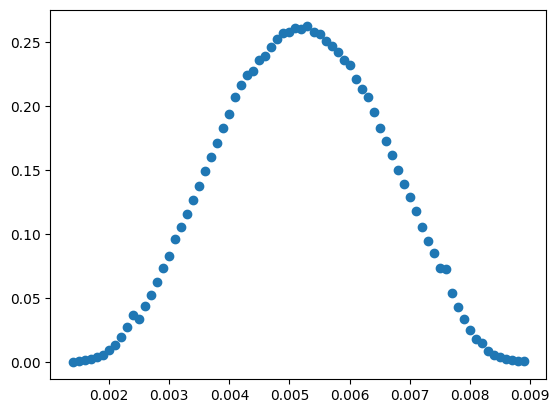

In [4]:
X = df['X'].values.astype(float)
X = X*pow(10,-5)
V = df['V'].values.astype(float)*pow(10,-3)
minV = np.min(V)
V = V-minV
plt.scatter(X,V)

In [5]:
y_data = V
# Load the data from the file
I0 = np.max(y_data)
d = 0.456e-3  # en metros
a = 0.1e-3  # en metros
x0 = np.where(y_data==I0)[0]
x0 = X[x0]# Valor alrededor del cual se realiza la aproximación
# Definir la función de interferencia con la aproximación lineal para sin(theta)
x_data = (X-x0)


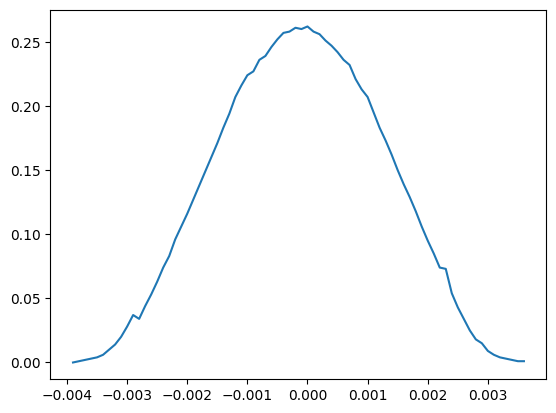

In [6]:
plt.plot(x_data,y_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Optimal parameters:
A = -0.2590357080512182 ± 0.0007970340170547339
B = -440.45179238695704 ± 1.4214207730614876
C = 1.5267829747816193 ± 0.0015531324657385227
D = 0.2600656653175514 ± 0.0005469834165119993


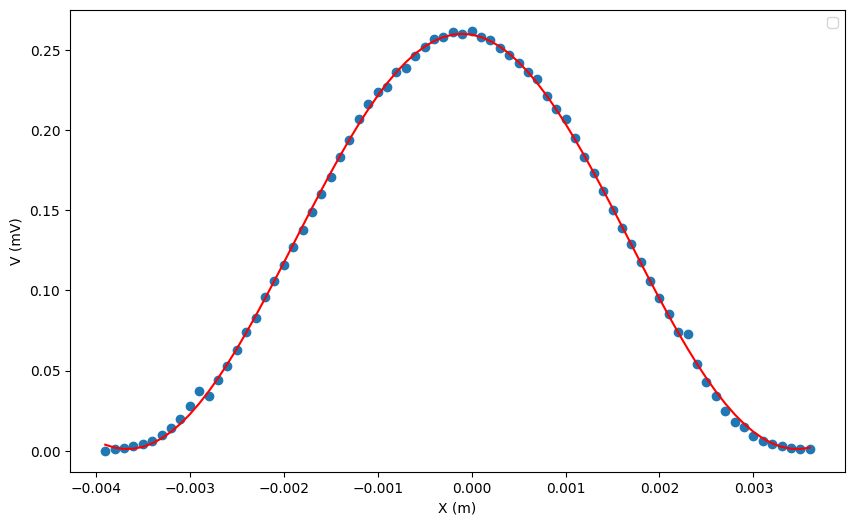

d:  -9.393410713577307e-05
V0:  -0.2590357080512182
0.0004560000000000001
-9.393410713577307e-05 1.4214207730614876


In [9]:
lamb = 670*pow(10,-9)

# Define the model function with x0 fixed
def model_function(x, A, B, C, D):
    term1 = A*(np.cos(B*(x)+C)**2)
    return term1 + D
guessC = a*np.pi/lamb

guessD = d*np.pi/lamb
# Initial guesses for the parameters (these might need adjusting)
initial_guesses = [I0,guessC, guessD]

# Perform the curve fitting
popt, pcov = curve_fit(model_function, x_data, y_data)

# Extract the optimal parameters and their estimated standard deviations
A_opt, B_opt, C_opt, D_opt = popt
perr = np.sqrt(np.diag(pcov))

print(f"Optimal parameters:")
print(f"A = {A_opt} ± {perr[0]}")
print(f"B = {B_opt} ± {perr[1]}")
print(f"C = {C_opt} ± {perr[2]}")
print(f"D = {D_opt} ± {perr[3]}")


# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
y_fit = model_function(x_data, *popt)

plt.plot(x_data, y_fit, 'r-')
plt.scatter(x_data,y_data)
plt.xlabel('X (m)')
plt.ylabel('V (mV)')
plt.legend()
plt.show()
print('d: ', B_opt* lamb/np.pi)
print('V0: ', A_opt)
print(guessD*lamb/np.pi)
print(B_opt*lamb/np.pi, perr[1])
